# Assignment 3 - Reinforcement Learning  

<font color="blue"> Nirvi Parikh </font>

# Overview
1.The main objective of Assignment 3 is to learn and understand Reinforcement Learning algorithm and further implement Maze Problem and Blackjack problem.<br>
2.The TD learing method being used for Maze Problem is SARSA and Q-learning and Blackjack is Q-Learing.<br>
3.Test cases have been evaluated for Maze and Blackjack problem and results for these test cases are simply the choice of the parameters.<br>
4.Plots and visualization graphs are being generated corresponding to the code.

### SARSA and Q-Learning:

SARSA and Q-Learning are approaches in Temporal Difference used to update the Q-table values if there are a large number of states. In this approach each state and action is mapped with a value belonging to real number which indicates the action that should be taken when in a particular state so as to maximize the rewards. So Q-table can be said store a mapping of states and actions to real number values and higher the value of the action for that state higher is the rewards we will get if we take that action while in that state.

SARSA and Q-Learning are almost similar approaches with a slight variation in updating the Q-table. In SARSA we assume that we are following a certain policy and choose tha actions to be taken as if they were taken as that policy and update the Q-table accordingly. It is also called *on-policy* control. It can be given as

$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)) 
$$

In Q-Learning or *off-policy* control we dont assume and follow any policy but rather update the Q-table exploring all policies and choosing the suitable one. It can be given as:


$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma \max_a Q(s_{t+1}, a) - Q(s_t, a_t)) 
$$


# Problems 

## A. Maze Problem
Maze problem is classical example of reinforcement learning technique for solving problems by a feedback system (rewards and penalties) applied on an agent which operates in an environment and needs to move through a series of states in order to reach a pre-defined final state.<br>
<br>
An example is a rat (agent) which is trying to find the shortest route from a starting cell to a target cheese cell in a maze (environment).<br>

The agent is experimenting and exploiting past experiences (episodes) in order to achieve its goal. It may fail again and again, but hopefully, after lots of trial and error (rewards and penalties) it will arrive to the solution of the problem. The solution will be reached if the agent finds the optimal sequence of states in which the accumulated sum of rewards is maximal (in short, we lure the agent to accumulate a maximal reward, and while doing so, he actually solves our problem). It may happen that in order to reach the goal, the agent will have to endure many penalties (negative rewards) on its way.<br>

In [41]:
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Sample Grid Environment File

I have created a grid.txt file with three characters, 'O', 'H', and 'G'.
- 'O': open space
- 'H': Wall or obstacles
- 'G': Goal location 

In [42]:
df=pd.read_csv("grid.txt")

### GridWorld Class


In [43]:
# maze example

class GridWorld:
        def __init__(self, fn):
        # read a map from a file
        self._map = self.read_map(fn)
        self._size = np.asarray(self._map.shape)
        self.goal_pos = np.where(self._map == 'G')

        # definition of actions (left, right, up, and down repectively)
        self._actions = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self._s = None

    def get_cur_state(self):
        return self._s

    def get_size(self):
        return self._size

    def read_map(self, fn):
        grid = []
        with open(fn) as f:
            for line in f:
               grid.append(list(line.strip()))
        return np.asarray(grid)

    def print_map(self):
        print( self._map )

    def check_state(self, s):
        if isinstance(s, collections.Iterable) and len(s) == 2:
            if s[0] < 0 or s[1] < 0 or\
               s[0] >= self._size[0] or s[1] >= self._size[1]:
               return 'N'
            return self._map[tuple(s)].upper()
        else:
            return 'F'  # wrong input

    def init(self, state=None):
        if state is None:
            s = [0, 0]
        else:
            s = state

        if self.check_state(s) == 'O':
            self._s = np.asarray(state)
        else:
            raise ValueError("Invalid state for init")

    def next(self, a):
        s1 = self._s + self._actions[a]
        # state transition
        curr = self.check_state(s1)
        
        if curr == 'H' or curr == 'N':
            return -5
        elif curr == 'F':
            warnings.warn("invalid state " + str(s1))
            return -5
        elif curr == 'G':
            self._s = s1
            return 30
        else:
            self._s = s1
            return -1
        
    def is_goal(self):
        return self.check_state(self._s) == 'G'
            
    def get_actions(self):
        return self._actions

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 14)

## Explanation of GridWorld Environment:

The *GridWorld* class contains all the methods required to train the agent to perform any task in the grid world environment.<br> 
It return certain characteristics of the grid.<br>
It also agent at any given moment.<br>

In Grid World environment there are four actions (left, right, up, and down) to move an agent in a grid.<br>
-If it reaches a goal, it get 30 points of reward.<br>
-If it falls in a hole or moves out of the grid world, it gets -5.<br>
-Each step costs -1 point.<br>

        
        Parameters
        ==========
        _map        ndarray
                    string array read from a file input
        _size       1d array
                    the size of _map in ndarray
        goal_pos    tuple
                    the index for the goal location
        _actions    list
                    list of actions for 4 actions
        _s          1d array
                    current state
   

Following are the method it includes and their functionalities:

-get_cur_state():Returns the current state of the agent.<br>
-get_size():Gives the size of the grid.<br>
-read_map():Reads the file whose name is passed as a parameterand stores the contents as an array.<br>
-print_map():Prints the grid.<br>
-check_state(): This function verifies if the location of the agent is a valid grid location or not by comparing current location to the grid size.<br>
-init():It takes state as parameter and initializes the grid to make the passed state as the start state and also verifies that the passed state is with grid limits and not an obstacle cell before making it the start state.<br>
-next():Action to be taken is passed as parameter to this method and based on the current state and action passed, the agent is moved to the approporpriate direction. The reward that the agent receives as a result of the action is returned by the method.<br>
-is_goal():Method verifies and returns boolean value if the current state is the goal state or not.<br>
-get_actions():Returns the list of possible actions that agent has available.<br>

In [44]:
env = GridWorld("grid.txt")
env.print_map()

[['O' 'O' 'O' 'H' 'O' 'O' 'O' 'O' 'O']
 ['O' 'O' 'O' 'H' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'H' 'H' 'H' 'O' 'O']
 ['O' 'O' 'H' 'O' 'O' 'O' 'O' 'O' 'H']
 ['O' 'O' 'H' 'O' 'O' 'O' 'G' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']]


In [45]:
# top-left to (0,0)
def coord_convert(s, sz):
    return [s[1], sz[0]-s[0]-1]

### Preferred Approach

For Maze Learning problem I have implemented both the policies.

## RLAgent for Maze


In [46]:
class RLAgent: 
    
    def __init__(self, evn):
        self.env = env
        self.size = env.get_size()
        self.n_a = len(env.get_actions())
        self.Q = np.zeros((self.size[0], self.size[1], self.n_a))
    
    
    def greedy(self, Q, s):
        return np.argmax(Q[s[0],s[1]])  # greedy action selection

    def epsilon_greed(self, epsilon, s):
        # TODO: Finish this function
        if np.random.rand() < epsilon:
            return np.random.randint(4)
        else:
            return self.greedy(self.Q,s)
    
    def train(self, start, **params):
        
        # parameters
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 1000) 
        maxstep= params.pop('maxstep', 1000)
        
        # init self.Q matrix
        self.Q[...] = 0
        self.Q[self.env._map == 'H'] = -np.inf
        
        # online train
        # rewards and step trace
        rtrace = []
        steps = []
        for j in range(maxiter):

            env.init(start)
            s = env.get_cur_state()
            # selection an action
            a = self.epsilon_greed(epsilon, s)

            rewards = []
            trace = np.array(coord_convert(s, self.size))
            # run simulation for max number of steps 
            for step in range(maxstep):
                # move
                r = env.next(a)
                s1 = env.get_cur_state()
                a1 = self.epsilon_greed(epsilon, s1)
                #rint("step= ",step,"new a1= ",a1,"\n")
                rewards.append(r)
                trace = np.vstack((trace, coord_convert(s1, self.size)))

                self.Q[s[0],s[1], a] += alpha * (r + gamma * self.Q[s1[0],s1[1], a1] - self.Q[s[0],s[1],a])  
                
                
                if env.is_goal():                     
                    self.Q[s1[0], s1[1], a1] = 0
                    break

                s = s1
                a = a1

            rtrace.append(np.sum(rewards))
            steps.append(step+1)
        return rtrace, steps, trace 
    def test(self, start, maxstep=1000):
            env.init(start)
            s = env.get_cur_state()
            epsilon=0.1
            a = self.epsilon_greed(epsilon, s)
            trace = np.array(coord_convert(s, self.size))
            for step in range(maxstep):
                # move
                r = env.next(a)
                s1 = env.get_cur_state()
                a1 = self.epsilon_greed(epsilon, s1)
                trace = np.vstack((trace, coord_convert(s1, self.size)))

                if env.is_goal(): 
                    self.Q[s1[0], s1[1], a1] = 0
                    break

                s = s1
                a = a1

            return trace            

## Explaination of the RLAgent Class:

The RLAgent class is the class containing all the methods to train the model using reinforcement learning and update and Q-table values using either *SARSA* or *Q-Learning* rule. It contains 4 methods described below:

-init():It is the constructor of the class in order to set the environment to solve the GridWorld Problem.<br>

-epsilon_greed():By using this method we can choose an action based on the current state of the agent. It takes epsilon and current state as the parameters and returns action to be taken as output.Futher we compare the epsilon value to a random integer and if it is greater we give a random action to be taken in that state and if its less then we call greed() method which chooses the action based on the Q table value for that state.

-train():This is the main method used to train the model for solving the grid problem and updating the Q table concurrently. It initializes values of alpha, epsilon, gamma, maxiterations and max steps. It also keeps a track of steps and rewards as a part of the array. It takes the start state as one of the parameters from which we find the path to the goal state on the grid and initilizes values of Q table appropriately.We then traverse through 2 nested for loops of size maxiter and maxsteps to begin from starting position and try to reach the goal state by taking values either randomly or from Q-table.Finally the Q-table is updated to store the values for the states which can be used by the model in future and thats how the model is trained and every time an action is taken, the reward associated with that action is calculated and entry is made into the Q-table by either SARSA or Q-learning to train the model to identify which is best action for a state. The inner for loop is basically deciding the path and updating the Q-table based on the states encountered and rewards received. It checks if the goal state is reached and breaks from loop if goal is achieved whereas outer loop is for finding the different paths in order to improve the choosing of actions by the agent. Lastly the rewards are calculated after each action and returned as a sum of all rewards while reaching from start to goal in one itereation.<br>

Why is Q-table entry for GOAL state 0?

As indicated by me the move to be made when in a specific state is picked in light of a genuine number put away against that state in the Q-table. In view of the greatest number put away we make the fitting move in that state. However, when in GOAL state we might not want to make any further move since we have just accomplished the objective and subsequently we make it 0 with the goal that no further move perhaps made.

-test():The test method is similar to the train method with only difference that we do not update the Q-table in here.


### Utility functions for Plotting

In [47]:
### Plotting tools 

def plot_trace(agent, start, trace, title="test trajectory"):
    plt.plot(trace[:, 0], trace[:, 1], "ko-")
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.xlim([0, agent.size[1]])
    plt.ylim([0, agent.size[0]])
    

def plot_train(agent, rtrace, steps, trace, start):

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(221)
    # TODO: plot rewards 
    plt.plot(rtrace)
    plt.ylabel("sum of rewards")

    ax1 = fig.add_subplot(222)
    # TODO: plot steps
    plt.plot(steps)
    plt.ylabel("# steps")

    # contour plot for agent.Q
    ax2 = fig.add_subplot(223)
    xs = range(agent.size[1])
    ys = range(agent.size[0])
    maxQ = np.max(agent.Q, axis=2)
    h_b = (maxQ==-np.inf)
    maxQ[h_b] = 0
    maxQ[h_b] = np.min(maxQ) - 100
    cs = plt.contourf(xs, ys[::-1], maxQ)
    plt.colorbar(cs)
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.ylabel("max agent.Q")

    # plot traces
    ax3 = fig.add_subplot(224)
    plot_trace(agent, start, trace, "trace of the last episode")

    plt.plot()

In [48]:
env = GridWorld("grid.txt")
env.print_map()

agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)

[['O' 'O' 'O' 'H' 'O' 'O' 'O' 'O' 'O']
 ['O' 'O' 'O' 'H' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'H' 'H' 'H' 'O' 'O']
 ['O' 'O' 'H' 'O' 'O' 'O' 'O' 'O' 'H']
 ['O' 'O' 'H' 'O' 'O' 'O' 'G' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']]


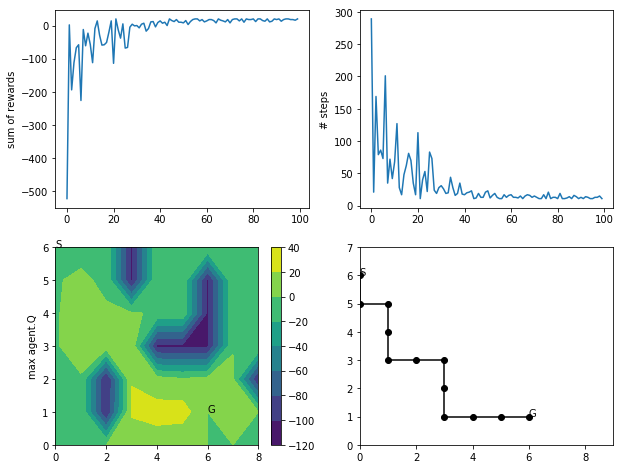

In [49]:
plot_train(agent, rtrace, steps, trace, start)

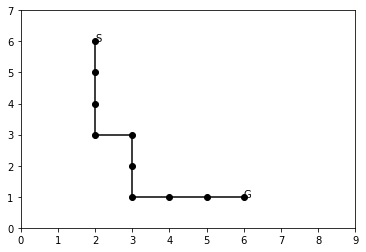

In [50]:
test_start = [0,2]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

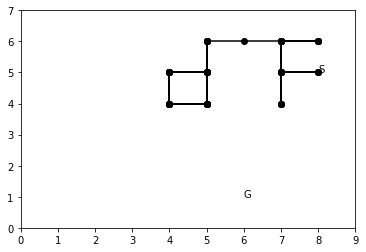

In [51]:
test_start = [1,8]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

## B. Blackjack-V0

![](https://upload.wikimedia.org/wikipedia/commons/a/a2/Blackjack_game_1.JPG)

Now, we play Blackjack! 
https://gym.openai.com/envs/Blackjack-v0/


Blackjack is played with a standard international deck of cards with the Jokers removed, leaving 52 cards. 

After the dealer has shuffled a player will be selected at random and asked to take the cut card – a coloured plastic card matching the playing cards in size – and place it at a random position within stack of cards. The dealer will then move the cards above the cut card to the back of the stack. This technique is intended to demonstrate to the players that the dealer cannot have rigged the deck. The cut card is then reinserted into the stack of cards by the dealer at a pre-defined position and when this card is reached this indicates the final deal of the game before the cards are shuffled.

Where multiple decks are used, after the shuffle the cards will be placed into a dispenser called a shoe. This piece of equipment has two purposes: to hold large stacks of cards in multi-deck games and make the practice of hole carding (cheating by catching a glimpse of the dealer’s hole card) more difficult. In fact hole carding is not illegal in the vast majority of jurisdictions. If the dealer is poorly trained or sloppy enough to fail to protect their down card from being seen by a player at the table this is not the player's fault and the player is not obliged to look away to prevent themselves seeing the down card. If however the player uses any form of device, for instance a metal lighter to observe the reflection in, or an accomplice off table signals the information to them, this is cheating. Hole carding is only legal where the player can see the card naturally from one of the player positions at the table.

Card Values
When playing Blackjack the numeral cards 2 to 10 have their face values, Jacks, Queens and Kings are valued at 10, and Aces can have a value of either 1 or 11. The Ace is always valued at 11 unless that would result in the hand going over 21, in which case it is valued as 1.

Any hand with an Ace valued as 11 is called a ‘soft’ hand. All other hands are ‘hard’ hands.

A starting hand of a 10 valued card and an Ace is called a Blackjack or natural and beats all hands other than another Blackjack. If both the player and dealer have Blackjack, the result is a push (tie): neither the player nor the bank wins and the bet is returned to the player.

### BlackJack Class

In [52]:
import gym
from gym import spaces
from gym.utils import seeding

def cmp(a, b):
    return float(a > b) - float(a < b)

# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]


def draw_card(np_random):
    return int(np_random.choice(deck))


def draw_hand(np_random):
    return [draw_card(np_random), draw_card(np_random)]


def usable_ace(hand):  # Does this hand have a usable ace?
    return 1 in hand and sum(hand) + 10 <= 21


def sum_hand(hand):  # Return current hand total
    if usable_ace(hand):
        return sum(hand) + 10
    return sum(hand)


def is_bust(hand):  # Is this hand a bust?
    return sum_hand(hand) > 21


def score(hand):  # What is the score of this hand (0 if bust)
    return 0 if is_bust(hand) else sum_hand(hand)


def is_natural(hand):  # Is this hand a natural blackjack?
    return sorted(hand) == [1, 10]


class BlackjackEnv(gym.Env):
    def __init__(self, natural=False):
        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Tuple((
            spaces.Discrete(32),
            spaces.Discrete(11),
            spaces.Discrete(2)))
        self.seed()

        # Flag to payout 1.5 on a "natural" blackjack win, like casino rules
        # Ref: http://www.bicyclecards.com/how-to-play/blackjack/
        self.natural = natural
        # Start the first game
        self.reset()

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, action):
        assert self.action_space.contains(action)
        if action:  # hit: add a card to players hand and return
            self.player.append(draw_card(self.np_random))
            if is_bust(self.player):
                done = True
                reward = -1
            else:
                done = False
                reward = 0
        else:  # stick: play out the dealers hand, and score
            done = True
            while sum_hand(self.dealer) < 17:
                self.dealer.append(draw_card(self.np_random))
            reward = cmp(score(self.player), score(self.dealer))
            if self.natural and is_natural(self.player) and reward == 1:
                reward = 1.5
        return self._get_obs(), reward, done, {}

    def _get_obs(self):
        return (sum_hand(self.player), self.dealer[0], usable_ace(self.player))

    def reset(self):
        self.dealer = draw_hand(self.np_random)
        self.player = draw_hand(self.np_random)
        return self._get_obs()

### Explanation of Blackjack Environment:

The BlackJack-V0 environment is there in the BlackjackEnv class which imitates the real life blackjack playing environment. The BlackjackEnv class contains methods to handle possible scenarios that could occur while playing real life blackjack. The class contains 5 main methods with functionalities as follows:<br>

-init():Contructor of the class to initantiate and initialize certain attributes.<br>
-get_obs():Describes state as sum of players cards, dealers visible card and whether the player has a usable ace or not.<br>
-reset():It is basically the initialization of the game where random cards are drawn and assigned to player and dealer and by calling reset method indicated that we are starting a new game of blackjack.<br>
-step():This is the main method which takes action as the input and returns attributes like next state, reward and boolean variable indicating whether the game has been won by anyone or not. It checks if the action passed is a valid action and if valid, decides what impact the action will have on current state. Checks if action is hit and if yes draws a card. If this busts  then it returns appropriate rewards. If action is stick then it plays out the dealers hand calculates the score.Rewards of -1, 0 and 1 are assigned for loss, draw and wins respectivley and assigns 1.5 if natural win occurs.It handles the certain situations of blackjack like dealer drawing card if sum is less than 17.<br>
    

### Preferred Approach
For Blackjack I have opted for Q-learning approach considering the simplicity of implementation and better understanding for the approach.

### RLAgent for BlackJack

In [53]:
import gym
import matplotlib.pyplot as plt
import numpy as np
env = gym.make('Blackjack-v0')
import random

In [61]:
class BlackJackAgent():
    def __init__(self, env):
        self.env = env
        self.n_a = 2
        self.observation_space = env.observation_space
        self.Q= dict()
        self.valid_actions=list(range(self.env.action_space.n))
        self.epsilon = 0.1
    

    def epsilon_greedy(self, s):
        if s not in self.Q:
            self.Q[s] = dict((action, 0.0) for action in self.valid_actions)
            
        if random.random()>self.epsilon:
            if s not in self.Q:
                self.Q[observation] = dict((action, 0.0) for action in self.valid_actions)
            maxQ=max(self.Q[s].values())
            action = random.choice([k for k in self.Q[s].keys()
                                    if self.Q[s][k] == maxQ])
        else:
            action = random.choice(self.valid_actions)
        return action
            
   
    def train(self,**params):
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxepisodes = params.pop('maxepisodes',800)
        rtrace=[]
        rewards=[]
        win=0
        lose=0
        draw=0
        totalReward=0
        for j in range(maxepisodes):
            round=1
            s = env.reset()
            a = self.epsilon_greedy(s)
            is_done = False
            
            for step in range(maxepisodes):
                a = self.epsilon_greedy(s)
                s1,payout,is_done,_ = env.step(a)
                totalReward+=payout
                a1=self.epsilon_greedy(s1)
                self.Q[s][a] += alpha * (payout + gamma * self.Q[s1][a1]- self.Q[s][a])
                
                if is_done:
                    env.reset()
                    round+=1
                    if payout>0:
                        win+=1
                    elif payout==0:
                        draw+=1
                    else:
                        lose+=1
                    break
                rewards.append(totalReward)
                s=s1
                a=a1
            rtrace.append(np.sum(rewards))
        print("\nTRAIN Method stats for alpha = ",alpha,", epsilon = ",epsilon,", gamma = ",gamma," and maxepisodes = ",maxepisodes,": ")
        print("WINS = ",win,"\t Win percentage = ",(win/maxepisodes)*100)
        print("DRAWS = ",draw,"\t Draw percentage= ",(draw/maxepisodes)*100)
        print("LOSSES = ",lose,"\t Loss percentage = ",(lose/maxepisodes)*100)
        return rewards

    def test(self,**params):
            gamma = params.pop('gamma', 0.99)
            alpha = params.pop('alpha', 0.1)
            epsilon= params.pop('epsilon', 0.1)
            maxepisodes = params.pop('maxepisodes',800)
            rtrace=[]
            win=0
            lose=0
            draw=0
            for j in range(maxepisodes):
                
                s = env.reset()
                a = self.epsilon_greedy(s)
                #a=self.choose_action(s)
                #print("s=",s)
                rewards=[]

                is_done = False

                for step in range(maxepisodes):
                    a = self.epsilon_greedy(s)
                    s1,payout,is_done,_ = env.step(a)
                    a1=self.epsilon_greedy(s1)
                    #self.Q[s][a] += alpha * (payout + gamma * self.Q[s1][a1]- self.Q[s][a])

                    if is_done:
                        if payout>0:
                            win+=1
                        elif payout==0:
                            draw+=1
                        else:
                            lose+=1
                        rewards.append(payout)
                        break

                    s=s1
                    a=a1
                rtrace.append(np.sum(rewards))
            print("\nTEST Method stats for alpha = ",alpha,", epsilon = ",epsilon,", gamma = ",gamma," and maxepisodes = ",maxepisodes,": ")
            print("WINS = ",win,"\t Win percentage = ",(win/maxepisodes)*100)
            print("DRAWS = ",draw,"\t Draw percentage= ",(draw/maxepisodes)*100)
            print("LOSSES = ",lose,"\t Loss percentage = ",(lose/maxepisodes)*100)
            return

    def test_Experiment(self,**params):
            gamma = params.pop('gamma', 0.99)
            alpha = params.pop('alpha', 0.1)
            epsilon= params.pop('epsilon', 0.1)
            maxepisodes = params.pop('maxepisodes',800)
            rtrace=[]
            win=0
            lose=0
            draw=0
            gameReward=0
            totalPayout=0
            totalReward=[]
            for j in range(maxepisodes):
                
                s = env.reset()
                a = self.epsilon_greedy(s)
                #a=self.choose_action(s)
                #print("s=",s)
                rewards=[]

                is_done = False

                for step in range(maxepisodes):
                    a = self.epsilon_greedy(s)
                    s1,payout,is_done,_ = env.step(a)
                    a1=self.epsilon_greedy(s1)
                    totalPayout += payout 
                    if is_done:
                        gameReward+=totalPayout
                        if payout>0:
                            win+=1
                        elif payout==0:
                            draw+=1
                        else:
                            lose+=1
                        rewards.append(payout)
                        break
                    totalReward.append(gameReward)

                    s=s1
                    a=a1
                rtrace.append(np.sum(rewards))
            winPercentage = (win/maxepisodes)*100
            return rtrace,winPercentage   
        

In [63]:
a = BlackJackAgent(env)
rewards=agent.train(alpha =0.01,epsilon=0.1,gamma=0.99,maxepisodes=1000)
a.test(alpha =0.01,epsilon=0.1,gamma=0.99,maxepisodes=1000)
a1= BlackJackAgent(env)
a2= BlackJackAgent(env)
rewards2=agent2.train(alpha =0.1,epsilon=0.1,gamma=0.99,maxepisodes=1000)
a2.test(alpha =0.1,epsilon=0.1,gamma=0.99,maxepisodes=1000)


TRAIN Method stats for alpha =  0.01 , epsilon =  0.1 , gamma =  0.99  and maxepisodes =  1000 : 
WINS =  362 	 Win percentage =  36.199999999999996
DRAWS =  72 	 Draw percentage=  7.199999999999999
LOSSES =  566 	 Loss percentage =  56.599999999999994

TEST Method stats for alpha =  0.01 , epsilon =  0.1 , gamma =  0.99  and maxepisodes =  1000 : 
WINS =  287 	 Win percentage =  28.7
DRAWS =  39 	 Draw percentage=  3.9
LOSSES =  674 	 Loss percentage =  67.4

TRAIN Method stats for alpha =  0.1 , epsilon =  0.1 , gamma =  0.99  and maxepisodes =  1000 : 
WINS =  371 	 Win percentage =  37.1
DRAWS =  73 	 Draw percentage=  7.3
LOSSES =  556 	 Loss percentage =  55.60000000000001

TEST Method stats for alpha =  0.1 , epsilon =  0.1 , gamma =  0.99  and maxepisodes =  1000 : 
WINS =  276 	 Win percentage =  27.6
DRAWS =  36 	 Draw percentage=  3.5999999999999996
LOSSES =  688 	 Loss percentage =  68.8


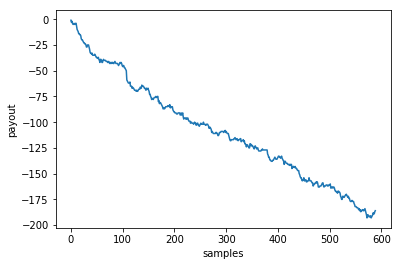

In [64]:
plt.plot(rewards2)           
plt.xlabel('samples')
plt.ylabel('payout')
plt.show()

### Experiment to find optimal value of attributes to train the model

([-1.0, -1, -1, -1.0, 1.0, -1.0, -1, -1, 1.0, -1, -1.0, 1.0, 1.0, -1, 1.0, -1, 1.0, 1.0, -1.0, -1.0, -1, -1, 0.0, -1, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1, -1.0, 1.0, -1, -1, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1, 1.0, -1.0, 1.0, 1.0, 1.0, -1, 1.0, -1, -1, -1, -1.0, -1.0, 1.0, -1, -1, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1, 1.0, -1.0, -1, -1, -1, -1, -1, -1.0, -1, 1.0, -1, -1, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 0.0, 1.0, -1.0, -1, 1.0, -1, -1.0, 1.0, -1, -1.0, -1, -1, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1, 1.0, -1, -1, 1.0, -1.0, -1, 0.0, -1, -1.0, 1.0, -1, -1.0, -1, -1, -1.0, -1.0, 1.0, 1.0, -1.0, -1, -1.0, -1, -1.0, -1.0, -1.0, 0.0, -1.0, -1.0, -1.0, -1, -1, 1.0, -1.0, 1.0, -1, -1, 1.0, -1.0, -1, -1, -1, 1.0, 1.0, -1.0, -1, 1.0, -1.0, 0.0, -1.0, -1, 0.0, 1.0, -1, 1.0, -1, -1, 1.0, -1.0, 1.0, 1.0, -1, -1, -1.0, 1.0, -1, -1.0, 1.0, -1.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1, 0.0, 1.0, -1, -1, -1.0, 1.0, -1, 0.0, 1.0, 1.0, -1.0, -1, -1.0, -1, -1, 1.0, -1, 0.0,

ValueError: setting an array element with a sequence.

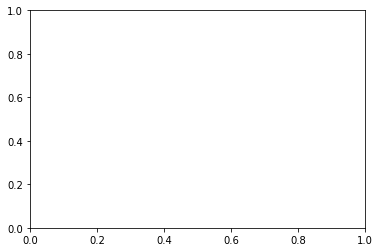

In [67]:
import gym
env = gym.make('Blackjack-v0')
a=BlackJackAgent(env)
epsilonValues=[0.9,0.5,0.25,0.1]
calculatedRewards = []
for epsilon in epsilonValues:
    calculatedRewards.append(a.test_Experiment(epsilon=epsilon))
for reward in calculatedRewards:
    print(reward)
    plt.plot(reward)

### Explanation of BlackJackAgent :
-init():Constructor of class for assigning environment, initializing Q table, taking action space and many more.<br>
-train():Important method of the class to train the model; takes optional paramters as input if not given assigns default values. Initializes variables like win,loose, draw, rewards, etc.After execution of both loops we calculate the wins, loss and draws out of the total games played and thereby calculate their percentages as well.<br>
-test():Like the Maze Problem RL Agent the test() methodis exactly similar to the train with only change that instead of updating the Q table, here we only fetch values from the Q-table while calling epsilon function.<br>
-test_Experiment():It is just used to find best epsilon, gamma and alpha values for model.<br>
-epsilon_greedy():If epsilon is smaller than random number, we get the action with maximum value for that state from the Q table dictionary and returns that value to be taken.This method either return value 1 for hit or 0 for stick based on which the next state is dependent.

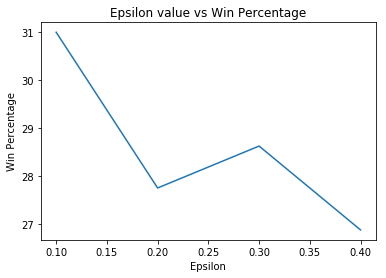

In [68]:


#epsilon
import gym
env = gym.make('Blackjack-v0')
agent=BlackJackAgent(env)
epsilonValues=[0.1,0.2,0.3,0.4]
calculatedRewards = []
win=[]
for epsilon in epsilonValues:
    rtrace,winPercentage = agent.test_Experiment(epsilon=epsilon)
    calculatedRewards.append(rtrace)
    win.append(winPercentage)
    
rewardSum=[]
for reward in calculatedRewards:
    rewardSum.append(sum(reward))

plt.title("Epsilon value vs Win Percentage")
plt.xlabel("Epsilon")
plt.ylabel("Win Percentage")
plt.plot(epsilonValues,win)
plt.show()

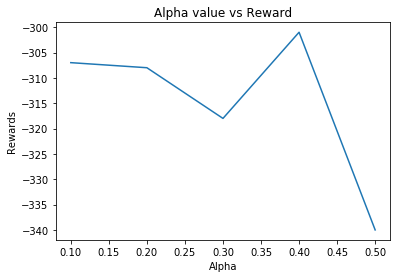

In [69]:


#alpa

import gym
env = gym.make('Blackjack-v0')
agent=BlackJackAgent(env)
alphaValues=[0.1,0.2,0.3,0.4,0.5]
calculatedRewards = []
win=[]
for alpha in alphaValues:
    rtrace,winPercentage = agent.test_Experiment(alpha=alpha)
    calculatedRewards.append(rtrace)
    win.append(winPercentage)
    
rewardSum=[]
for reward in calculatedRewards:
    rewardSum.append(sum(reward))

plt.plot(alphaValues,rewardSum)
plt.title("Alpha value vs Reward")
plt.xlabel("Alpha")
plt.ylabel("Rewards")
plt.show()


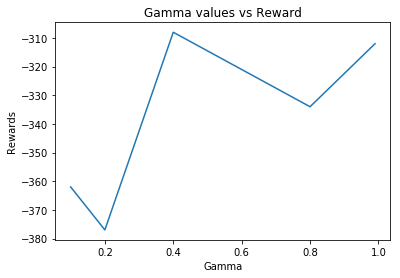

In [70]:

#gamma

import gym
env = gym.make('Blackjack-v0')
agent=BlackJackAgent(env)
gammaValues=[0.10,0.20,0.40,0.80,0.99]
calculatedRewards = []
win=[]
for gamma in gammaValues:
    rtrace,winPercentage = agent.test_Experiment(gamma=gamma)
    calculatedRewards.append(rtrace)
    win.append(winPercentage)
    
rewardSum=[]
for reward in calculatedRewards:
    rewardSum.append(sum(reward))

plt.plot(gammaValues,rewardSum)
plt.title("Gamma values vs Reward")
plt.xlabel("Gamma")
plt.ylabel("Rewards")
plt.show()


# V. Conclusions
I have learned to learn reinforcement learning and neural networks by this assignment.It made me go through various aspects of SARSA and Q learning.Implementing both the algorithms,I understood that SARSA was better and easy to implemt.

References:
https://curiouscoder.space/blog/machine%20learning/teaching-a-computer-blackjack-using-reinforcement-learning/
https://en.wikipedia.org/wiki/State%E2%80%93action%E2%80%93reward%E2%80%93state%E2%80%93action